# **Nutrition, Physical Activity, and Obesity - Behavioral Risk Factor Surveillance System**

 **Libraries**

In [1]:
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV

**Dataset & Preferences**

In [2]:
warnings.filterwarnings('ignore')

sns.set_theme(style='whitegrid', font='serif')

DATASETURL = 'https://raw.githubusercontent.com/Jerald011003/BRFSS-Analysis/refs/heads/main/datasets/Nutrition__Physical_Activity__and_Obesity_-_Behavioral_Risk_Factor_Surveillance_System.csv'

# I. Exploratory Data **Analysis**

In [3]:
data = pd.read_csv(DATASETURL)

data.head()

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,Data_Value_Type,...,GeoLocation,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
0,2011,2011,AK,Alaska,BRFSS,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,2011.0,Value,...,"(64.845079957001, -147.722059036)",OWS,OWS1,Q036,VALUE,2,Race/Ethnicity,2 or more races,RACE,RACE2PLUS
1,2011,2011,AK,Alaska,BRFSS,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,2011.0,Value,...,"(64.845079957001, -147.722059036)",OWS,OWS1,Q036,VALUE,2,Race/Ethnicity,Other,RACE,RACEOTH
2,2011,2011,AK,Alaska,BRFSS,Physical Activity,Physical Activity - Behavior,Percent of adults who achieve at least 150 min...,2011.0,Value,...,"(64.845079957001, -147.722059036)",PA,PA1,Q044,VALUE,2,Gender,Female,GEN,FEMALE
3,2011,2011,AK,Alaska,BRFSS,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,2011.0,Value,...,"(64.845079957001, -147.722059036)",OWS,OWS1,Q036,VALUE,2,Age (years),35 - 44,AGEYR,AGEYR3544
4,2011,2011,AK,Alaska,BRFSS,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,2011.0,Value,...,"(64.845079957001, -147.722059036)",OWS,OWS1,Q037,VALUE,2,Income,"$15,000 - $24,999",INC,INC1525


In [4]:
# Display the dataset information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104272 entries, 0 to 104271
Data columns (total 33 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   YearStart                   104272 non-null  int64  
 1   YearEnd                     104272 non-null  int64  
 2   LocationAbbr                104272 non-null  object 
 3   LocationDesc                104272 non-null  object 
 4   Datasource                  104272 non-null  object 
 5   Class                       104272 non-null  object 
 6   Topic                       104272 non-null  object 
 7   Question                    104272 non-null  object 
 8   Data_Value_Unit             88872 non-null   float64
 9   Data_Value_Type             104272 non-null  object 
 10  Data_Value                  93505 non-null   float64
 11  Data_Value_Alt              93505 non-null   float64
 12  Data_Value_Footnote_Symbol  10767 non-null   object 
 13  Data_Value_Foo

In [5]:
# Display the dataset statistics
data.describe(include='all')

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,Data_Value_Type,...,GeoLocation,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
count,104272.000000,104272.000000,104272,104272,104272,104272,104272,104272,88872.000000,104272,...,102340,104272,104272,104272,104272,104272.000000,104272,104272,104272,104272
unique,NaN,NaN,55,55,1,3,3,9,NaN,1,...,105,3,3,9,1,NaN,6,28,6,28
top,NaN,NaN,AK,Alaska,BRFSS,Physical Activity,Physical Activity - Behavior,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(18.220833, -66.590149)",PA,PA1,Q036,VALUE,NaN,Race/Ethnicity,2 or more races,RACE,RACE2PLUS
freq,NaN,NaN,1932,1932,104272,55720,55720,19684,NaN,104272,...,1512,55720,55720,19684,104272,NaN,29792,3724,29792,3724
mean,2017.006176,2017.006176,NaN,NaN,NaN,NaN,NaN,NaN,2016.019534,NaN,...,NaN,NaN,NaN,NaN,NaN,31.053706,NaN,NaN,NaN,NaN
std,3.734882,3.734882,NaN,NaN,NaN,NaN,NaN,NaN,3.120714,NaN,...,NaN,NaN,NaN,NaN,NaN,17.605859,NaN,NaN,NaN,NaN
min,2011.000000,2011.000000,NaN,NaN,NaN,NaN,NaN,NaN,2011.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
25%,2014.000000,2014.000000,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,17.000000,NaN,NaN,NaN,NaN
50%,2017.000000,2017.000000,NaN,NaN,NaN,NaN,NaN,NaN,2016.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,30.000000,NaN,NaN,NaN,NaN
75%,2020.000000,2020.000000,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,45.000000,NaN,NaN,NaN,NaN


In [6]:
# Preview columns
data.columns

Index(['YearStart', 'YearEnd', 'LocationAbbr', 'LocationDesc', 'Datasource',
       'Class', 'Topic', 'Question', 'Data_Value_Unit', 'Data_Value_Type',
       'Data_Value', 'Data_Value_Alt', 'Data_Value_Footnote_Symbol',
       'Data_Value_Footnote', 'Low_Confidence_Limit', 'High_Confidence_Limit ',
       'Sample_Size', 'Total', 'Age(years)', 'Education', 'Gender', 'Income',
       'Race/Ethnicity', 'GeoLocation', 'ClassID', 'TopicID', 'QuestionID',
       'DataValueTypeID', 'LocationID', 'StratificationCategory1',
       'Stratification1', 'StratificationCategoryId1', 'StratificationID1'],
      dtype='object')

In [7]:
# Preview dataset numerical and categorical columns
num_cols = data.select_dtypes(include=np.number).columns
cat_cols = data.select_dtypes(include='object').columns

print(f'Numerical Columns\n{num_cols}\n')
print(f'Categorical Columns\n{cat_cols}')

Numerical Columns
Index(['YearStart', 'YearEnd', 'Data_Value_Unit', 'Data_Value',
       'Data_Value_Alt', 'Low_Confidence_Limit', 'High_Confidence_Limit ',
       'Sample_Size', 'LocationID'],
      dtype='object')

Categorical Columns
Index(['LocationAbbr', 'LocationDesc', 'Datasource', 'Class', 'Topic',
       'Question', 'Data_Value_Type', 'Data_Value_Footnote_Symbol',
       'Data_Value_Footnote', 'Total', 'Age(years)', 'Education', 'Gender',
       'Income', 'Race/Ethnicity', 'GeoLocation', 'ClassID', 'TopicID',
       'QuestionID', 'DataValueTypeID', 'StratificationCategory1',
       'Stratification1', 'StratificationCategoryId1', 'StratificationID1'],
      dtype='object')


# **II. Data Cleaning and Preprocessing**

In [8]:
# Summation of missing values
print("Missing values per column:")
data.isnull().sum()

Missing values per column:


,0
YearStart,0
YearEnd,0
LocationAbbr,0
LocationDesc,0
Datasource,0
Class,0
Topic,0
Question,0
Data_Value_Unit,15400
Data_Value_Type,0


In [9]:
# Summation of duplicated rows
data.duplicated().sum()

0

In [10]:
irrelevant_columns = ['ClassID', 'TopicID', 'QuestionID', 'DataValueTypeID', 'Data_Value_Unit',
                      'LocationID', 'StratificationCategoryId1', 'StratificationID1']
data_cleaned = data.drop(columns=irrelevant_columns)

In [11]:
data_cleaned.columns = data_cleaned.columns.str.strip()

In [12]:
data_cleaned = data_cleaned.dropna(subset=['Data_Value', 'Low_Confidence_Limit', 'High_Confidence_Limit'])

In [13]:
# Fill missing values in categorical columns with 'Unknown'
categorical_columns = data_cleaned.select_dtypes(include=['object']).columns
data_cleaned[categorical_columns] = data_cleaned[categorical_columns].fillna('Unknown')

# Fill missing values in numeric columns with the column mean
numeric_columns = data_cleaned.select_dtypes(include=['float64', 'int64']).columns
data_cleaned[numeric_columns] = data_cleaned[numeric_columns].fillna(data_cleaned[numeric_columns].mean())


In [14]:
print("\nMissing values after cleaning:")
data_cleaned.isnull().sum()


Missing values after cleaning:


,0
YearStart,0
YearEnd,0
LocationAbbr,0
LocationDesc,0
Datasource,0
Class,0
Topic,0
Question,0
Data_Value_Type,0
Data_Value,0


**Saved Cleaned Data**


In [15]:
# cleaned_file_path = 'cleaned_data.csv'
# data_cleaned.to_csv(cleaned_file_path, index=False)

In [16]:
data_cleaned.head()

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Type,Data_Value,...,Sample_Size,Total,Age(years),Education,Gender,Income,Race/Ethnicity,GeoLocation,StratificationCategory1,Stratification1
0,2011,2011,AK,Alaska,BRFSS,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,Value,23.3,...,128.0,Unknown,Unknown,Unknown,Unknown,Unknown,2 or more races,"(64.845079957001, -147.722059036)",Race/Ethnicity,2 or more races
1,2011,2011,AK,Alaska,BRFSS,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,Value,35.5,...,63.0,Unknown,Unknown,Unknown,Unknown,Unknown,Other,"(64.845079957001, -147.722059036)",Race/Ethnicity,Other
2,2011,2011,AK,Alaska,BRFSS,Physical Activity,Physical Activity - Behavior,Percent of adults who achieve at least 150 min...,Value,21.7,...,1702.0,Unknown,Unknown,Unknown,Female,Unknown,Unknown,"(64.845079957001, -147.722059036)",Gender,Female
3,2011,2011,AK,Alaska,BRFSS,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,Value,29.5,...,562.0,Unknown,35 - 44,Unknown,Unknown,Unknown,Unknown,"(64.845079957001, -147.722059036)",Age (years),35 - 44
4,2011,2011,AK,Alaska,BRFSS,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,Value,33.5,...,377.0,Unknown,Unknown,Unknown,Unknown,"$15,000 - $24,999",Unknown,"(64.845079957001, -147.722059036)",Income,"$15,000 - $24,999"


In [17]:
# Preview cleaned dataset numerical and categorical columns
num_cols = data_cleaned.select_dtypes(include=np.number).columns
cat_cols = data_cleaned.select_dtypes(include='object').columns
# data_cleaned = data_cleaned[data_cleaned['cat_cols'].notna()]
# data_cleaned['cat_cols'].fillna('Unknown', inplace=True)

print(f'Numerical Columns\n{num_cols}\n')
print(f'Categorical Columns\n{cat_cols}')

Numerical Columns
Index(['YearStart', 'YearEnd', 'Data_Value', 'Data_Value_Alt',
       'Low_Confidence_Limit', 'High_Confidence_Limit', 'Sample_Size'],
      dtype='object')

Categorical Columns
Index(['LocationAbbr', 'LocationDesc', 'Datasource', 'Class', 'Topic',
       'Question', 'Data_Value_Type', 'Data_Value_Footnote_Symbol',
       'Data_Value_Footnote', 'Total', 'Age(years)', 'Education', 'Gender',
       'Income', 'Race/Ethnicity', 'GeoLocation', 'StratificationCategory1',
       'Stratification1'],
      dtype='object')


In [18]:
scaler = StandardScaler()
data_cleaned[num_cols] = scaler.fit_transform(data_cleaned[num_cols])

# Loop through each numerical column to detect and remove outliers
for column in num_cols:
    Q1 = data_cleaned[column].quantile(0.25)
    Q3 = data_cleaned[column].quantile(0.75)
    IQR = Q3 - Q1
    data_cleaned = data_cleaned[~((data_cleaned[column] < (Q1 - 1.5 * IQR)) |
                                   (data_cleaned[column] > (Q3 + 1.5 * IQR)))]
print("Final dataset info:")
print(data_cleaned.info())
print(data_cleaned.isnull().sum())

Final dataset info:
<class 'pandas.core.frame.DataFrame'>
Index: 81313 entries, 0 to 104271
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   YearStart                   81313 non-null  float64
 1   YearEnd                     81313 non-null  float64
 2   LocationAbbr                81313 non-null  object 
 3   LocationDesc                81313 non-null  object 
 4   Datasource                  81313 non-null  object 
 5   Class                       81313 non-null  object 
 6   Topic                       81313 non-null  object 
 7   Question                    81313 non-null  object 
 8   Data_Value_Type             81313 non-null  object 
 9   Data_Value                  81313 non-null  float64
 10  Data_Value_Alt              81313 non-null  float64
 11  Data_Value_Footnote_Symbol  81313 non-null  object 
 12  Data_Value_Footnote         81313 non-null  object 
 13  Low_Confidence_

# **III. Data Visualization**

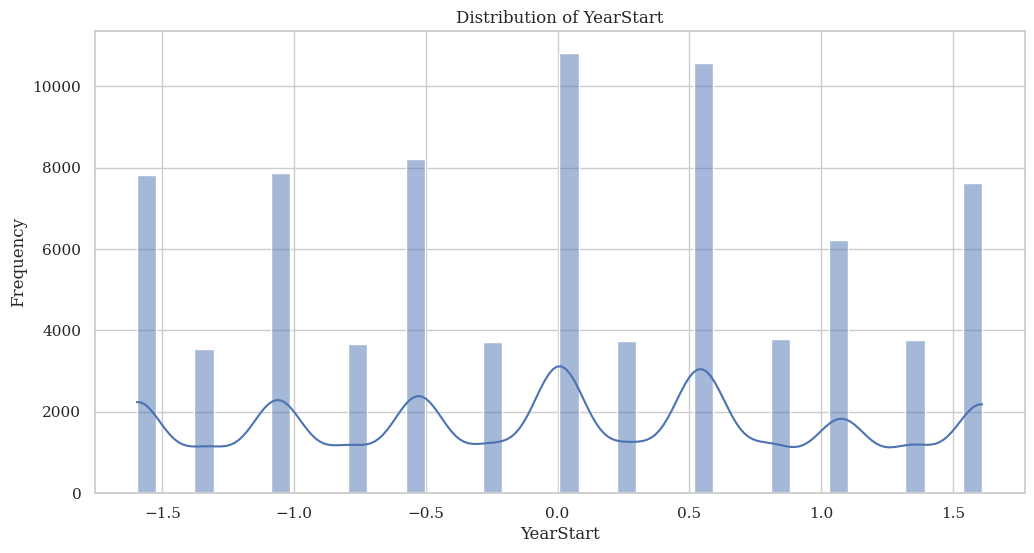

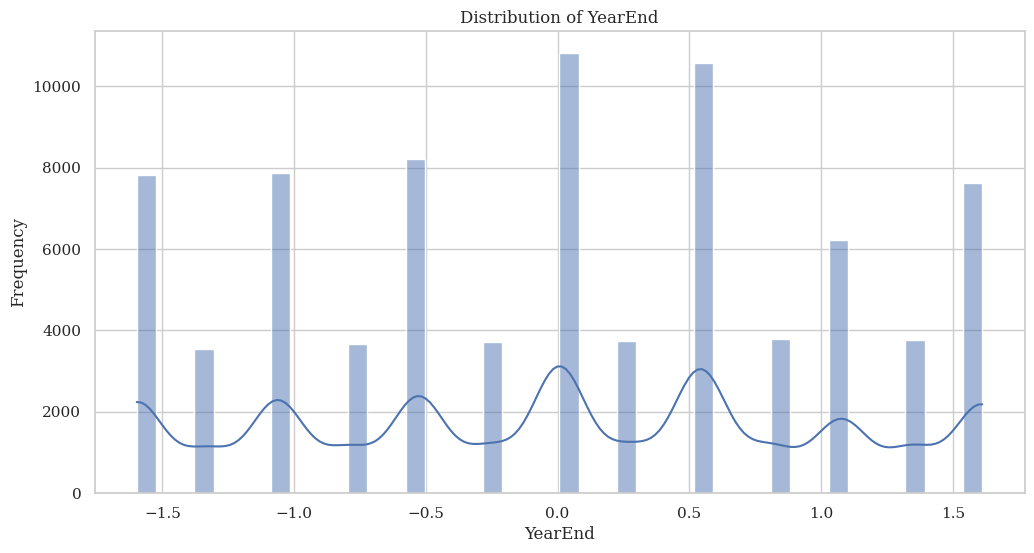

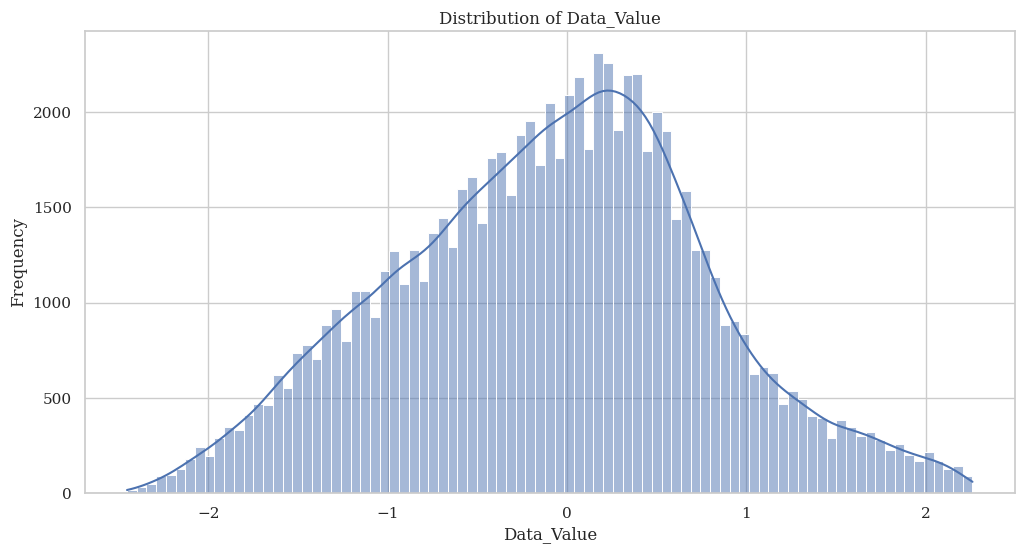

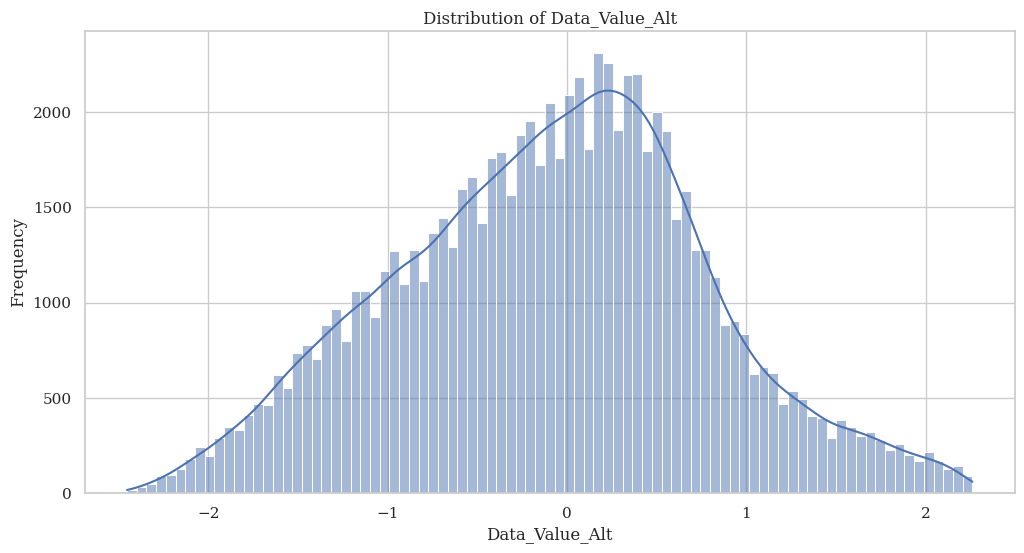

In [ ]:
# Numerical Categories Visualization
# def distribution_of_data(data_cleaned, column):
#     fig, ax = plt.subplots(figsize=(12, 6))

#     # Filter out 'Unknown' values before plotting
#     filtered_data = data_cleaned[data_cleaned[column] != 'Unknown']

#     sns.histplot(filtered_data[column], kde=True, ax=ax)

#     # !!! THE UNKNOWNS ARE EXCLUDED TO UNDERSTAND TRENDS/RELATIONSHIP MORE CLEARER
#     ax.set_title(f'Distribution of {column}')
#     ax.set_xlabel(column)
#     ax.set_ylabel('Frequency')

#     plt.show()

#     # !!! EXCLUDING THESE COLUMNS IT SHOWS FOR MORE CLEARER DISTRIBUTIONS
# exclude_cols = ['Datasource', 'Data_Value_Type', 'Data_Value_Footnote_Symbol',
#                  'Data_Value_Footnote', 'Total']

# # Loop through the categorical columns and plot distributions, excluding the specified columns
# for col in cat_cols:
#     if col not in exclude_cols:
#         distribution_of_data(data_cleaned, col)

# Numerical Categories Visualization
def distribution_of_data(data_cleaned, column):
    fig, ax = plt.subplots(figsize=(12, 6))

    # Plot the distribution of the data with dynamic bins
    sns.histplot(data_cleaned[column], kde=True, ax=ax)

    # Set the title and labels
    ax.set_title(f'Distribution of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')

    # Show the plot
    plt.show()

for col in num_cols:
    distribution_of_data(data_cleaned, col)

In [ ]:
def count_plot(data_cleaned, column):
    plt.figure(figsize=(12, 6))
    sns.countplot(data=data_cleaned, x=column, order=data_cleaned[column].value_counts().index)
    plt.title(f'Count Plot of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

for col in cat_cols:
    count_plot(data_cleaned, col)

In [ ]:
# Box plot for Data_Value
plt.figure(figsize=(10, 6))
sns.boxplot(x=data_cleaned['Data_Value'])
plt.title('Box Plot of Data_Value')
plt.xlabel('Data_Value')
plt.show()


In [ ]:
numerical_data = data_cleaned[num_cols]
corr = numerical_data.corr()

fig, ax = plt.subplots(figsize=(12, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', ax=ax, fmt='.2f', linewidths=.5, mask=np.triu(corr))

ax.set_title('Correlation Matrix')

plt.show()

# **IV. Model Development**
*   Use at least four (4) algorithms.

1.   Logistic Regression
2.   Support Vector Machine (SVM)
3.   Random Forest
4.   Gradient Boosting

In [ ]:
columns_to_drop = ["YearStart", "YearEnd", "LocationAbbr", "LocationDesc", "Datasource",
                   "Question", "Data_Value_Type", "GeoLocation", "StratificationCategory1",
                   "Stratification1", "Data_Value_Footnote_Symbol", "Data_Value_Footnote"]
data_filtered = data_cleaned.drop(columns=columns_to_drop)

label_encoders = {col: LabelEncoder() for col in data_filtered.select_dtypes(include='object').columns}
for col, le in label_encoders.items():
    data_filtered[col] = le.fit_transform(data_filtered[col])

X = data_filtered.drop(columns="Class")
y = data_filtered["Class"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

imputer = SimpleImputer(strategy="mean")
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Support Vector Machine": SVC(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier()
}

model_performance = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    model_performance[name] = {"Accuracy": accuracy, "Classification Report": report}

print(model_performance)

# **V. Model Evaluation**

In [ ]:
# print("First 5 rows of the training dataset (features):")
# print(X_train[:5])
# print("\nFirst 5 rows of the training dataset (labels):")
# print(y_train[:5])

# print("\nFirst 5 rows of the test dataset (features):")
# print(X_test[:5])
# print("\nFirst 5 rows of the test dataset (labels):")
# print(y_test[:5])

model_performance = {}

def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    return accuracy, report, y_pred

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Support Vector Machine": SVC(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier()
}

for name, model in models.items():
    accuracy, report, y_pred = evaluate_model(model, X_train, y_train, X_test, y_test)

    model_performance[name] = {
        "Accuracy": accuracy,
        "Classification Report": report,
        "Confusion Matrix": confusion_matrix(y_test, y_pred)
    }

    if accuracy < 0.85:
        print(f"{name} did not meet the accuracy threshold. Tuning hyperparameters...")

        if name == "Random Forest":
            param_grid = {
                'n_estimators': [50, 100, 200],
                'max_depth': [None, 10, 20, 30],
                'min_samples_split': [2, 5, 10]
            }
            grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
            grid_search.fit(X_train, y_train)
            best_model = grid_search.best_estimator_
            accuracy, report, y_pred = evaluate_model(best_model, X_train, y_train, X_test, y_test)

            model_performance[name] = {
                "Accuracy": accuracy,
                "Classification Report": report,
                "Confusion Matrix": confusion_matrix(y_test, y_pred)
            }

for name, metrics in model_performance.items():
    print(f"Model: {name}")
    print(f"Accuracy: {metrics['Accuracy']* 100:.2f}%")
    print("Classification Report:")
    print(metrics["Classification Report"])
    print("Confusion Matrix:")
    print(metrics["Confusion Matrix"])
    print("-" * 40)
